https://www.jiqizhixin.com/articles/2018-10-26-8

在Github上可以找到本Jupyter Notebook：https://github.com/tristanga/Data-Analysis/blob/master/Notebooks/Automatic Customer Segmentation with RFM %28Python%29.ipynb

相关报道：https://towardsdatascience.com/how-to-automatically-segment-customers-using-purchase-data-and-a-few-lines-of-python-36939fb587a4

In [44]:
import matplotlib as plt
import numpy as np
import warnings
import pandas as pd

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
url = 'https://github.com/tristanga/Data-Analysis/raw/master/Global%20Superstore.xls'

In [36]:
df = pd.read_excel(url)

In [38]:
df = df[(df.Segment=='Consumer') & (df.Country=='United States')]

In [62]:
df_RFM = df.groupby('Customer ID').agg({
    'Order Date': lambda y:(df['Order Date'].max().date() - y.max().date()).days,
    'Order ID': lambda y:len(y.unique()),
    'Sales': lambda y:round(y.sum(),2)
})

df_RFM.columns = ['Recency','Frequency','Monetary']
df_RFM.sort_values(by='Monetary',ascending=False)
df_RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5563.56
AA-10375,19,9,1056.39
AA-10480,259,4,1790.51
AA-10645,55,6,5086.93
AB-10015,415,3,886.16


In [66]:
quantiles = df_RFM.quantile(q=[0.8])
print(quantiles)
df_RFM['R'] = np.where(df_RFM['Recency']<=int(quantiles.Recency.values),2,1)
df_RFM['F'] = np.where(df_RFM['Frequency']>=int(quantiles.Frequency.values),2,1)
df_RFM['M'] = np.where(df_RFM['Monetary']>=int(quantiles.Monetary.values),2,1)
df_RFM.head()

     Recency  Frequency  Monetary    R    F    M
0.8    222.2        8.0   4070.17  2.0  2.0  1.4


,Customer ID,Recency,Frequency,Monetary,R,F,M,RMScore
0,AA-10315,184,5,5563.56,2,1,2,22
1,AA-10375,19,9,1056.39,2,2,1,12
2,AA-10480,259,4,1790.51,1,1,1,11
3,AA-10645,55,6,5086.93,2,1,2,22
4,AB-10015,415,3,886.16,1,1,1,11


In [74]:
# Measures creation
# Recency & Monetary
df_RFM['RMScore'] = df_RFM.M.map(str)+df_RFM.R.map(str)
df_RFM = df_RFM.reset_index()
df_RFM_SUM = df_RFM.groupby('RMScore').agg({
    'Customer ID': lambda y: len(y.unique()),
    'Monetary': lambda y: round(y.sum(),0),
    'Recency': lambda y: round(y.mean(),0),
    'Frequency': lambda y: round(y.mean(),0),
    'R': lambda y:round(y.mean(),0),
    'M': lambda y:round(y.mean(),0)    
})

In [75]:
df_RFM_SUM.sort_values('RMScore',ascending=False)

df_RFM_SUM.head()

,Customer ID,Monetary,Recency,Frequency,R,M
RMScore,,,,,,
11,73,111401.0,440,4,1,1
12,254,483007.0,70,6,2,1
21,9,77079.0,425,7,1,2
22,73,489914.0,59,8,2,2


# Average Monetary Matrix

In [71]:
df_RFM_M = df_RFM_SUM.pivot(index='M',columns='R',values='Monetary')
df_RFM_M = df_RFM_M.reset_index().sort_values(['M'],ascending=False).set_index('M')
df_RFM_M

R,1,2
M,,
2,77079.0,489914.0
1,111401.0,483007.0


# Recency

In [98]:
df_RFM_R = df_RFM_SUM.pivot(index='M',columns='R',values='Recency')
df_RFM_R = df_RFM_R.reset_index().sort_values(['M'],ascending=False).set_index(['M'])
df_RFM_R

R,1,2
M,,
2,425,59
1,440,70


# Numbers of customer matrix

In [99]:
df_RFM_C = df_RFM_SUM.pivot(index='M',columns='R',values='Customer ID')
df_RFM_C = df_RFM_C.reset_index().sort_values(['M'],ascending=False).set_index(['M'])
df_RFM_C

R,1,2
M,,
2,9,73
1,73,254


In [89]:
import matplotlib.pyplot as plt
import squarify as sq

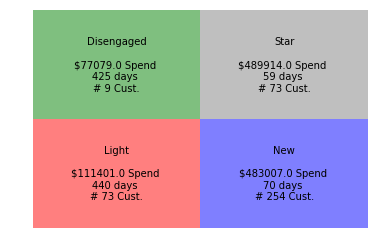

In [108]:
g1 = 'Light'+'\n'+'\n'+'${} Spend \n{} days \n# {} Cust.'.format(df_RFM_M.iloc[1,0],df_RFM_R.iloc[1,0],df_RFM_C.iloc[1,0])
g2 = 'Disengaged'+'\n'+'\n'+'${} Spend \n{} days \n# {} Cust.'.format(df_RFM_M.iloc[0,0],df_RFM_R.iloc[0,0],df_RFM_C.iloc[0,0])
g3 = 'New'+'\n'+'\n'+'${} Spend \n{} days \n# {} Cust.'.format(df_RFM_M.iloc[1,1],df_RFM_R.iloc[1,1],df_RFM_C.iloc[1,1])
g4 = 'Star'+'\n'+'\n'+'${} Spend \n{} days \n# {} Cust.'.format(df_RFM_M.iloc[0,1],df_RFM_R.iloc[0,1],df_RFM_C.iloc[0,1])

sq.plot(sizes=[10,10,10,10],label=[g1,g2,g3,g4],color=['red','green','blue','grey'],alpha=0.5)
plt.axis('off')
plt.show()